# MFCCs (Mel Frequency Cepstral Coefficients)


 The goal of this notebook is to:
 
 * extract the features in a dataset using MFCC methods

## 2. Data preparation

### 2.1 Import the libraries


In [1]:
#======== To navigate through folders and files as a whole ============ 
from os import chdir

#======== for feature extraction ==================
from python_speech_features import mfcc

#======== for data analysis ==================
import pandas as pd
import sklearn as sk
from sklearn.feature_selection import f_classif , f_regression , SelectKBest
# For mathematical operation
import numpy as np
import numpy.random as nr
import scipy,sklearn
# For plot
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
# For SVM
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
import sklearn.model_selection as ms
import sklearn.metrics as sklm
# For GMM
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
# Directory
audio_file_path = "/media/mydata/courses/PROJET/Pratical_part/data2"

# Change directory
chdir(audio_file_path)
sr=22050

### 2.2 Loading the data

In [8]:
df = pd.read_csv('final_data.csv')
data=df.T
lst2=['Celine','Celine','Celine','Celine','Celine','Celine','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Adele','Celine','Adele','Adele','Celine','Celine','Celine','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele',
 'Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou',
 'Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila',
 'Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila']
data['output']= lst2
data['lab']=data.output.map({"Celine":0,"Adele":1,"Garou":2,"Singuila":3})
# separate the predictor and response variables from the dataset
collist = data.columns.tolist()
cols_input = collist[0:263168]
data = data[cols_input + ["lab"]]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,263159,263160,263161,263162,263163,263164,263165,263166,263167,lab
0,-0.015948,-0.021025,-0.024122,-0.023574,-0.018674,-0.010003,0.000656,0.010829,0.018100,0.020864,...,-0.182515,-0.128457,-0.041981,0.046224,0.107028,0.111363,0.042921,-0.077803,-0.189423,0
1,-0.003060,-0.003395,-0.003619,-0.003764,-0.003857,-0.003920,-0.003969,-0.004009,-0.004032,-0.004023,...,-0.045864,-0.030337,-0.040960,-0.073816,-0.110153,-0.128534,-0.118635,-0.087783,-0.056163,0
2,-0.007804,-0.005254,-0.001886,0.001970,0.005888,0.009421,0.012171,0.013851,0.014322,0.013595,...,0.001610,0.009754,0.003367,0.002244,0.008993,0.011612,0.015421,0.021193,0.023067,0
3,0.000343,0.000216,0.000038,-0.000150,-0.000300,-0.000377,-0.000361,-0.000257,-0.000090,0.000100,...,0.029200,0.028005,0.026717,0.025379,0.024033,0.022719,0.021472,0.020322,0.019291,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.045842,-0.046278,-0.046686,-0.047066,-0.047418,-0.047740,-0.048032,-0.048294,-0.048524,0


### 2.3  Creation of Helper Functions

In [9]:
def extract_feat(sig,samplerate,nb_row):
    """This function takes as arguments the signal, the samplerate and the number of desire row in MFCC
     and produce a list containing the extracted features
    """
    mfcc_feat = mfcc(sig,numcep=13,samplerate=samplerate)
    l1=[]
    for j in range(len(mfcc_feat [0])):
        s=0
        for i in range(1,nb_row):
            s+=mfcc_feat[i][j]
        l1.append(s/(nb_row-1))
    return l1

### 2.4 Perform features extraction in the entire dataset

In [10]:
s=list()
for k in range(200):
    sig=data.loc[str(k) , cols_input ]
    s.append(extract_feat(sig,sr,31))
    
# creation of a dataframe with the features extracted
df = pd.DataFrame() 
for j in range(len(s)):
    df[j]=s[j]
df2=df.T

# add the names of different features
col_names=["feat_" + str(i) for i in range(1,14)]
df2.columns=col_names

# create class colum
df2["label"]=list(data["lab"])

# separate the predictor and response variables from the dataset
collist = df2.columns.tolist()
df2 = df2[col_names + ["label"]]

In [11]:
df2

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,label
0,-6.106617,20.328225,-28.186009,-5.345941,-7.712397,-0.066738,-4.815332,7.144537,18.621657,-10.552449,-35.684875,5.075547,37.854442,0
1,-7.250387,33.715712,-12.905864,-20.311111,-10.603501,-18.105534,-3.714380,31.666317,33.113522,2.814732,-6.423060,5.250746,1.903850,0
2,-7.900112,15.110173,-31.427479,-18.826846,-13.103554,10.786638,11.605322,-17.535467,-17.145561,10.558592,10.059452,-17.997132,4.653540,0
3,-9.003464,-6.529897,-36.525667,32.508780,-0.204419,10.248099,9.013638,-28.512670,24.955942,25.412256,-16.856642,5.065420,0.515344,0
4,-12.322063,21.503903,-22.838265,-20.683884,8.890285,6.258042,-23.723797,-24.333399,7.705630,21.263718,7.541809,1.054525,5.980803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-7.698749,26.673159,6.723266,-0.823217,-3.404806,9.396537,-4.151448,11.526520,3.437321,-7.473342,1.715664,3.350031,-6.196789,3
196,-6.998346,26.785839,-9.456949,6.424491,5.897310,-8.662553,1.330226,2.464837,-4.219024,19.255913,-6.579229,-15.656119,24.940120,3
197,-8.916287,20.731793,8.806801,-4.912733,13.789626,14.000766,-2.492095,-12.160738,0.406791,-13.505859,-15.653488,-5.132198,2.346931,3
198,-7.503281,8.045792,-14.004458,1.370232,-1.621425,-31.190905,-44.265843,-9.579728,-34.075941,8.349639,-18.903174,0.315696,16.586970,3


### 2.4 Export and save the finial dataset

In [13]:

#save the final data
df2.to_csv("Voice_data_mfcc.csv", index=False, encoding="utf-8")


## Singer's identification

In [3]:
df2 = pd.read_csv('Voice_data_mfcc.csv')

In [4]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,label
feat_1,1,0.114604,-0.267029,-0.0866124,-0.0411926,-0.0858745,0.0444264,0.0552475,-0.0400577,0.0583039,0.104029,-0.0107184,-0.0162846,0.083211
feat_2,0.114604,1,0.237246,-0.272552,0.0159134,-0.0720323,0.0296585,-0.093808,0.0696574,-0.110964,0.0737618,-0.0614197,-0.127223,-0.216064
feat_3,-0.267029,0.237246,1,0.234825,0.0946575,0.0977279,-0.0519283,-0.0438713,-0.0526881,-0.175704,-0.0443578,0.0293099,-0.107188,0.0363667
feat_4,-0.0866124,-0.272552,0.234825,1,0.301088,-0.156615,-0.0594548,-0.0581575,-0.0488716,-0.21769,-0.264488,0.0596864,0.0650493,0.146504
feat_5,-0.0411926,0.0159134,0.0946575,0.301088,1,0.0356284,-0.282196,-0.0919988,0.215386,0.0189783,-0.269715,-0.0236462,-0.00908464,0.0991463
feat_6,-0.0858745,-0.0720323,0.0977279,-0.156615,0.0356284,1,0.34469,0.0180759,0.343104,0.176373,0.0468455,-0.0840209,-0.0483094,-0.0774045
feat_7,0.0444264,0.0296585,-0.0519283,-0.0594548,-0.282196,0.34469,1,0.18876,0.0225032,0.0918908,0.0825033,-0.0520738,-0.0883264,-0.256986
feat_8,0.0552475,-0.093808,-0.0438713,-0.0581575,-0.0919988,0.0180759,0.18876,1,0.0746,-0.102911,0.171814,0.0158767,-0.0817417,0.166711
feat_9,-0.0400577,0.0696574,-0.0526881,-0.0488716,0.215386,0.343104,0.0225032,0.0746,1,0.366182,-0.256033,0.0529787,-0.0362052,-0.236757
feat_10,0.0583039,-0.110964,-0.175704,-0.21769,0.0189783,0.176373,0.0918908,-0.102911,0.366182,1,0.0446104,-0.0333653,0.0586574,-0.1443


In [5]:
X = np.array(df2.drop('label', axis=1))
y = np.array(df2['label'])

### SVM & GMM

### Impact of parameters


/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

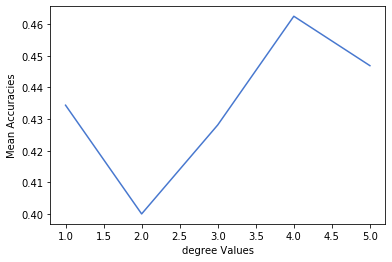

In [22]:
degree_vals = [1,2,3,4,5]
accuracy_vals = []
for g in degree_vals:
    svc = SVC(kernel='poly',degree=g)
    scores = cross_val_score(svc, X, y, cv=40, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(degree_vals, accuracy_vals)
plt.xlabel('degree Values')
plt.ylabel('Mean Accuracies')
plt.show()

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

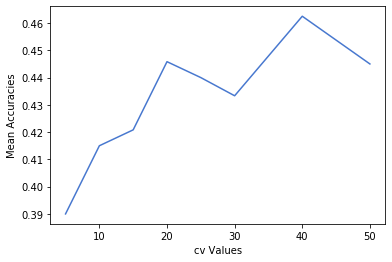

In [89]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='poly',degree=4)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

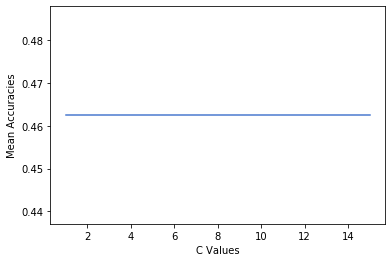

In [41]:
C_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy_vals = []
for g in C_vals:
    svc = SVC(kernel='poly',degree=4,C=g)
    scores = cross_val_score(svc, X, y, cv=40, scoring='accuracy')
    accuracy_vals.append(scores.mean())
plt.plot(C_vals, accuracy_vals)
plt.xlabel('C Values')
plt.ylabel('Mean Accuracies')
plt.show()


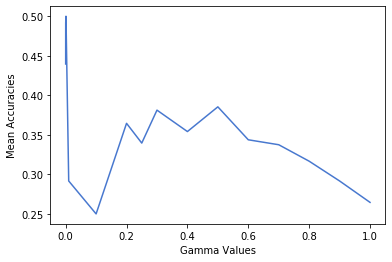

In [28]:
gamma_vals = [0.00001,0.0001,0.001,0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracy_vals = []
for g in gamma_vals:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(gamma_vals, accuracy_vals)
plt.xlabel('Gamma Values')
plt.ylabel('Mean Accuracies')
plt.show()

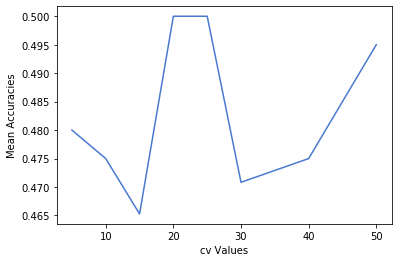

In [27]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='rbf', gamma=0.001)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

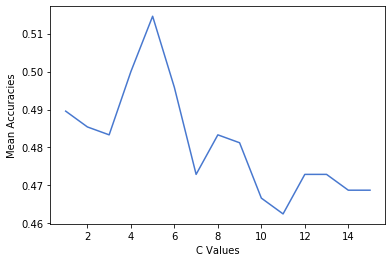

In [50]:
C_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy_vals = []
for g in C_vals:
    svc = SVC(kernel='rbf', gamma="scale",C=g)
    scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(C_vals, accuracy_vals)
plt.xlabel('C Values')
plt.ylabel('Mean Accuracies')
plt.show()

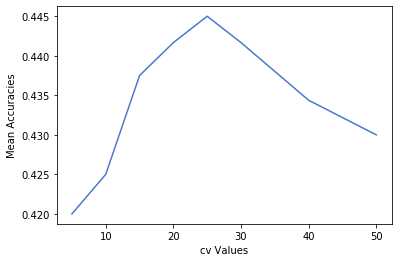

In [30]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='linear')
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

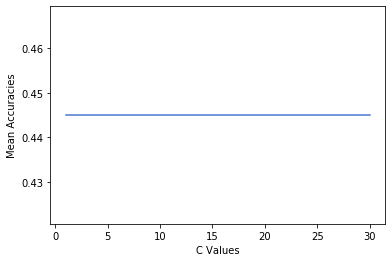

In [86]:
C_vals = [1,2,3,4,5,6,7,8,10,20,30]
accuracy_vals = []
for g in C_vals:
    svc = SVC(kernel='linear',C=g)
    scores = cross_val_score(svc, X, y, cv=25, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(C_vals, accuracy_vals)
plt.xlabel('C Values')
plt.ylabel('Mean Accuracies')
plt.show()

## svm model et gmm

In [71]:
svc = SVC(kernel='poly',degree=4,gamma='scale',decision_function_shape='ovo')
scores = cross_val_score(svc, X, y, cv=44, scoring='accuracy')
print(scores.mean())

0.5426136363636364


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svcl = SVC(kernel='linear')
scores = cross_val_score(svcl, X, y, cv=26, scoring='accuracy')
print(scores.mean())

0.44711538461538464


In [92]:
svc = SVC(kernel='rbf', gamma="scale",C=5)
scores = cross_val_score(svc, X, y, cv=24, scoring='accuracy')
print(scores.mean())

0.5190972222222222


In [39]:
lst=[]
for i in range(5):
    parameters = {'n_init':[1,2,5,7,8,10],'covariance_type':('full', 'tied', 'diag', 'spherical')}
    classifiers = GaussianMixture(n_components =4)
    clf = GridSearchCV(classifiers, parameters)
    scores = cross_val_score(clf, X, y, cv=15, scoring='accuracy')
    lst.append(scores.mean())
lst
l=np.mean(lst)
l, lst

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it exp

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will c

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:19

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:19

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:19

(0.31186813186813184,
 [0.323076923076923,
  0.34395604395604396,
  0.3139194139194139,
  0.27326007326007323,
  0.3051282051282051])

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
Cv_vals = [5,10,15,20,24,25,26,30,35,37,40,44,45,50]
accuracy_poly = []
accuracy_line = []
accuracy_rbf = []
accuracy_gmm = []
for g in Cv_vals:
    svc = SVC(kernel='linear')
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_line.append(scores.mean())
for g in Cv_vals:
    svc = SVC(kernel='poly',degree=4,gamma='scale',decision_function_shape='ovo')
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_poly.append(scores.mean())
for g in Cv_vals:
    svc = SVC(kernel='rbf', gamma="scale",C=5)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_rbf.append(scores.mean())
for g in Cv_vals:
    classifiers = GaussianMixture(n_components =4,n_init=2)
    scores = cross_val_score(classifiers, X, y, cv=g, scoring='accuracy')
    accuracy_gmm.append(scores.mean())
accuracy_line, accuracy_poly,accuracy_rbf, accuracy_gmm

([0.42000000000000004,
  0.4250000000000001,
  0.4375000000000001,
  0.4416666666666666,
  0.4427083333333333,
  0.445,
  0.44711538461538464,
  0.44166666666666665,
  0.4392857142857143,
  0.42567567567567566,
  0.434375,
  0.4375,
  0.4361111111111111,
  0.43],
 [0.44499999999999995,
  0.48,
  0.5027777777777778,
  0.5041666666666667,
  0.4947916666666667,
  0.495,
  0.4951923076923077,
  0.5041666666666667,
  0.525,
  0.5168918918918919,
  0.525,
  0.5426136363636364,
  0.5361111111111111,
  0.525],
 [0.41000000000000003,
  0.45,
  0.46944444444444444,
  0.5145833333333334,
  0.5190972222222222,
  0.515,
  0.5144230769230769,
  0.5,
  0.5214285714285715,
  0.5236486486486487,
  0.51875,
  0.53125,
  0.5277777777777778,
  0.52],
 [0.25,
  0.255,
  0.22490842490842491,
  0.23499999999999996,
  0.2569444444444444,
  0.255,
  0.2596153846153846,
  0.29126984126984123,
  0.2257142857142857,
  0.24234234234234234,
  0.25999999999999995,
  0.26022727272727275,
  0.2422222222222222,
  0.26]